In [21]:
from matplotlib import pyplot as plt
import inference
import cv2 as cv
import math
model = inference.get_model("chesspieces-eswj2/3")
response = model.infer(image="1226_1.jpg")

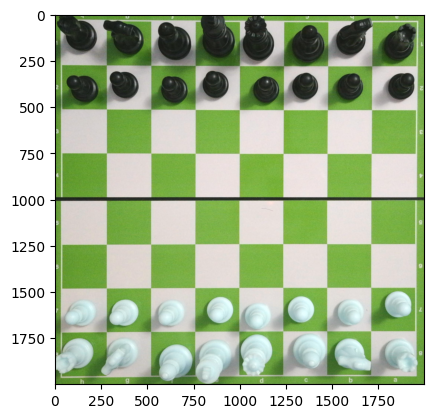

In [22]:
image = cv.imread("1226_1.jpg")
plt.imshow( image)

In [23]:
import numpy as np
height, width,_ = image.shape
num_rows = 8
num_cols = 8
square_width = width // num_cols
square_height = height // num_rows

board = np.empty((num_rows, num_cols), dtype=object)
def intersection_area(box1, box2):
    # box1 and box2 are [x_min, y_min, x_max, y_max]
    x_min = max(box1[0], box2[0])
    y_min = max(box1[1], box2[1])
    x_max = min(box1[2], box2[2])
    y_max = min(box1[3], box2[3])
    
    # If there is no intersection, return 0
    if x_min >= x_max or y_min >= y_max:
        return 0
    return (x_max - x_min) * (y_max - y_min)

for prediction in response[0].predictions:
    x, y, w, h = int(prediction.x), int(prediction.y), int(prediction.width), int(prediction.height)
    label = prediction.class_name

    xmin = int(x - w/2)
    xmax = int(x + w/2)
    ymin = int(y - h/2)
    ymax = int(y + h/2)

    max_overlap = 0
    best_square = None
    
    for row in range(num_rows):
        for col in range(num_cols):
            # Define the square (top-left and bottom-right corners)
            square_x_min = col * square_width
            square_y_min = row * square_height
            square_x_max = (col + 1) * square_width
            square_y_max = (row + 1) * square_height

            # Calculate the intersection area
            overlap = intersection_area([xmin, ymin, xmax, ymax], [square_x_min, square_y_min, square_x_max, square_y_max])
            
            if overlap > max_overlap:
                max_overlap = overlap
                best_square = (row, col)
    if best_square:
        board[best_square] = label

print(board)

[['rook-black' 'knight-black' 'bishop-black' 'king-black' 'queen-black'
  'bishop-black' 'knight-black' 'rook-black']
 ['pawn-black' 'pawn-black' 'pawn-black' 'pawn-black' 'pawn-black'
  'pawn-black' 'pawn-black' 'pawn-black']
 [None None None None None None None None]
 [None None None None None None None None]
 [None None None None None None None None]
 [None None None None None None None None]
 ['pawn-white' 'pawn-white' 'pawn-white' 'pawn-white' 'pawn-white'
  'pawn-white' 'pawn-white' 'pawn-white']
 ['rook-white' 'knight-white' 'bishop-white' 'king-white' 'queen-white'
  'bishop-white' 'knight-white' 'rook-white']]


In [24]:
def board_to_fen(board):
    # Define the piece mappings
    piece_map = {
        'rook-white': 'R', 'knight-white': 'N', 'bishop-white': 'B', 
        'queen-white': 'Q', 'king-white': 'K', 'pawn-white': 'P',
        'rook-black': 'r', 'knight-black': 'n', 'bishop-black': 'b', 
        'queen-black': 'q', 'king-black': 'k', 'pawn-black': 'p',
        None: ''
    }
    
    fen_rows = []
    
    for row in board:
        fen_row = ''
        empty_count = 0
        
        for square in row:
            piece = piece_map[square]
            if piece:  # If there's a piece
                if empty_count > 0:
                    fen_row += str(empty_count)  # Add number of empty squares
                    empty_count = 0
                fen_row += piece
            else:  # If it's an empty square
                empty_count += 1
        
        if empty_count > 0:  # If the row ends with empty squares
            fen_row += str(empty_count)
        
        fen_rows.append(fen_row)
        print(fen_rows)
    
    return '/'.join(fen_rows)

# Convert your board to FEN
fen = board_to_fen(board)
print(fen)

['rnbkqbnr']
['rnbkqbnr', 'pppppppp']
['rnbkqbnr', 'pppppppp', '8']
['rnbkqbnr', 'pppppppp', '8', '8']
['rnbkqbnr', 'pppppppp', '8', '8', '8']
['rnbkqbnr', 'pppppppp', '8', '8', '8', '8']
['rnbkqbnr', 'pppppppp', '8', '8', '8', '8', 'PPPPPPPP']
['rnbkqbnr', 'pppppppp', '8', '8', '8', '8', 'PPPPPPPP', 'RNBKQBNR']
rnbkqbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBKQBNR


In [25]:
import chess
from chess import engine
import stockfish
from stockfish.models import Stockfish

board_chess = chess.Board()
stockfish = Stockfish(r'C:\Users\tttha\Documents\Fall_2024\EE175\stockfish-windows-x86-64-avx2\stockfish\stockfish-windows-x86-64-avx2.exe')
stockfish.set_depth(20)
stockfish.set_skill_level(15)
stockfish.get_parameters()


{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 15,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

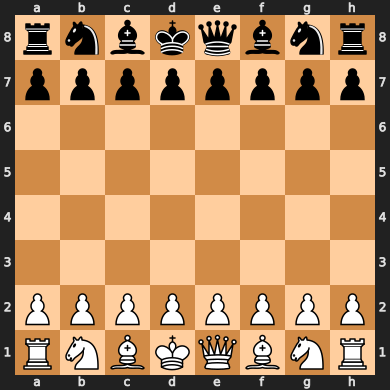

d2d4


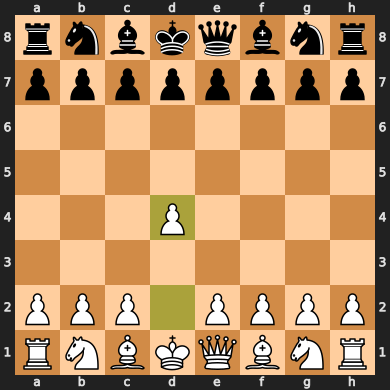

In [26]:
board_chess.set_fen(fen)
stockfish.set_fen_position(board_chess.fen())
display(board_chess)
best_move = stockfish.get_best_move()
print(best_move)
board_chess.push_san(best_move)
display(board_chess)

In [27]:
board_map = [
    [[-9.625, 1.375], [-6.875, 1.375], [-4.125, 1.375], [-1.375, 1.375], [1.375, 1.375], [4.125, 1.375], [6.875, 1.375], [9.625, 1.375]],
    [[-9.625, 4.125], [-6.875, 4.125], [-4.125, 4.125], [-1.375, 4.125], [1.375, 4.125], [4.125, 4.125], [6.875, 4.125], [9.625, 4.125]],
    [[-9.625, 6.875], [-6.875, 6.875], [-4.125, 6.875], [-1.375, 6.875], [1.375, 6.875], [4.125, 6.875], [6.875, 6.875], [9.625, 6.875]],
    [[-9.625, 9.625], [-6.875, 9.625], [-4.125, 9.625], [-1.375, 9.625], [1.375, 9.625], [4.125, 9.625], [6.875, 9.625], [9.625, 9.625]],
    [[-9.625, 12.375], [-6.875, 12.375], [-4.125, 12.375], [-1.375, 12.375], [1.375, 12.375], [4.125, 12.375], [6.875, 12.375], [9.625, 12.375]],
    [[-9.625, 15.125], [-6.875, 15.125], [-4.125, 15.125], [-1.375, 15.125], [1.375, 15.125], [4.125, 15.125], [6.875, 15.125], [9.625, 15.125]],
    [[-9.625, 17.875], [-6.875, 17.875], [-4.125, 17.875], [-1.375, 17.875], [1.375, 17.875], [4.125, 17.875], [6.875, 17.875], [9.625, 17.875]],
    [[-9.625, 20.625], [-6.875, 20.625], [-4.125, 20.625], [-1.375, 20.625], [1.375, 20.625], [4.125, 20.625], [6.875, 20.625], [9.625, 20.625]]
]

board_map = np.array(board_map)
def move_to_space(move, board_square_positions, z=2):
    """
    Convert a chess move into initial and target physical space coordinates.
    
    Args:
        move (str): A string representing the move, e.g., "e2e4".
        board_map (dict): A dictionary mapping chessboard positions to physical coordinates.
        z (float): The Z-coordinate for t he movement, default is 0.
        
    Returns:
        list: A list of two positions [[x_init, y_init, z], [x_next, y_next, z]].
    """
    init_column_index = ord(move[0]) - ord('a') + 1
    init_row_index = int(move[1])
    
    next_column_index = ord(move[2]) - ord('a') + 1
    next_row_index = int(move[3])
    x_init, y_init = board_map[init_row_index-1,init_column_index-1]

    x_next, y_next = board_map[next_row_index-1,next_column_index-1]
    pos = [[x_init,y_init,z],[x_next,y_next,z]]

    return pos

robot_config = {
    'link_lengths': [10.5, 14.7,18],  # Lengths of arm links
    'joint_limits': [(-math.pi, math.pi), (-math.pi/2, math.pi/2)],  # Joint limits in radians
}
coordinates = move_to_space(best_move,board_map)
print(best_move)
print(coordinates)

d2d4
[[-1.375, 4.125, 2], [-1.375, 9.625, 2]]


In [28]:
def is_next_position_occupied(board,move):
    # Check the next location
    next_column_index = ord(move[2]) - ord('a') + 1
    next_row_index = int(move[3])
    print(np.flip(board)[next_row_index-1,next_column_index-1])
    if (np.flip(board)[next_row_index-1,next_column_index-1] != None):
        return True
    else:
        return False
is_next_position_occupied(board,best_move)

None


False

[-1.375, 4.125, 2]
7.473798980736268 10.326539554219744
12.747356210968585
Theta1: 131.89 degrees
Theta2: -122.06 degrees
Theta3: -109.83 degrees
End-Effector Position: (4.35, -7.40)


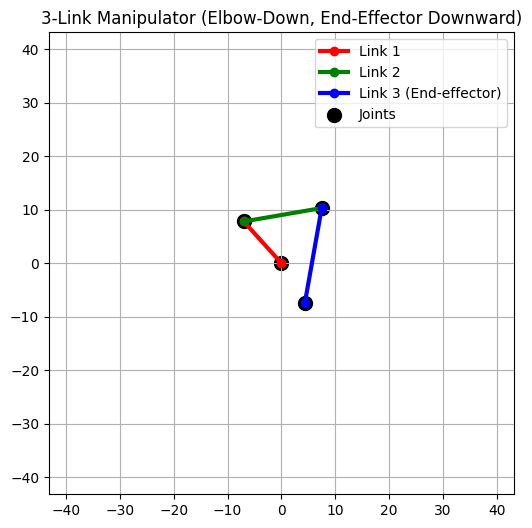

[-1.375, 9.625, 2]
12.848385439319776 10.326539554219744
16.48388387371706
Theta1: 100.16 degrees
Theta2: -100.19 degrees
Theta3: -99.97 degrees
End-Effector Position: (9.72, -7.40)


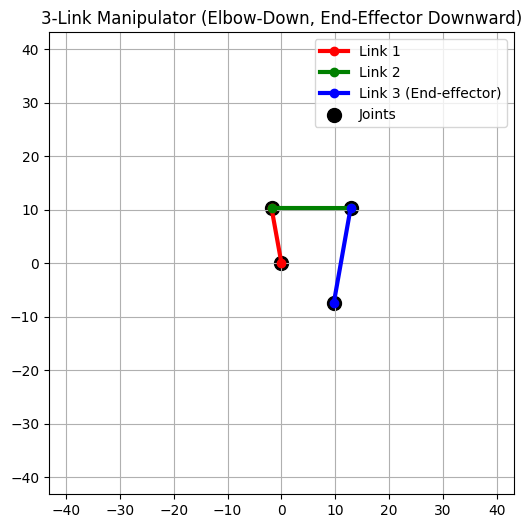

In [29]:
def manipulator_3DOF(L1,L2,L3, pos, end_angle):
    x, y, z = pos
    # Compute theta4
    theta4 = np.arctan2(y,x)
    
    r = np.sqrt(x**2 + y**2 + z**2)
    if r > L1 + L2 + L3:
        raise ValueError("Target is unreachable")
        
    new_y = z - 9.4
    new_x = np.sqrt(x**2 + y**2)
 
    if np.abs(end_angle) > np.pi/2:
        p2x = new_x + L3 * np.sin(np.abs(end_angle) - np.pi/2)
        p2y = new_y + L3 * np.cos(np.abs(end_angle) - np.pi/2)
        print(p2x, p2y)
    else:
        p2x = new_x - L3 * np.cos(end_angle)
        p2y = new_y - L3 * np.sin(end_angle) 
        print(p2x, p2y)
    
    r2 = np.sqrt(p2x**2 + p2y**2)
    print(r2)
    if r2 > L1 + L2:
        raise ValueError("End effector angle is not achievable")

    # Compute theta2
    c2 = (r2**2 - L1**2 - L2**2) / (2 * L1 * L2)
    s2 = -np.sqrt(1-c2**2)
    theta2 = np.arctan2(s2,c2)

    # Compute theta1
    s1 = (p2y*(L1 + L2*c2) - L2*s2*p2x)/(L1**2 + L2**2 + 2*L1*L2*c2)
    c1 = (p2x*(L1 + L2*c2) + L2*s2*p2y)/(L1**2 + L2**2 + 2*L1*L2*c2)
    theta1 = np.arctan2(s1,c1)

    # Compute theta3
    theta3 = end_angle - theta1 - theta2
    return [theta1, theta2, theta3, theta4]

def plot_robot(L1, L2, L3, theta1, theta2, theta3):
    # Compute joint positions
    x0, y0 = 0, 0
    x1, y1 = L1 * np.cos(theta1), L1 * np.sin(theta1)
    x2, y2 = x1 + L2 * np.cos(theta1 + theta2), y1 + L2 * np.sin(theta1 + theta2)
    x3, y3 = x2 + L3 * np.cos(theta1 + theta2 + theta3), y2 + L3 * np.sin(theta1 + theta2 + theta3)
    print(f"End-Effector Position: ({x3:.2f}, {y3:.2f})")
    
    # Plot
    plt.figure(figsize=(6,6))
    plt.plot([x0, x1], [y0, y1], 'ro-', lw=3, label="Link 1")
    plt.plot([x1, x2], [y1, y2], 'go-', lw=3, label="Link 2")
    plt.plot([x2, x3], [y2, y3], 'bo-', lw=3, label="Link 3 (End-effector)")
    plt.scatter([x0, x1, x2, x3], [y0, y1, y2, y3], c='k', s=100, label="Joints")
    plt.xlim(-L1-L2-L3, L1+L2+L3)
    plt.ylim(-L1-L2-L3, L1+L2+L3)
    plt.grid()
    plt.legend()
    plt.title("3-Link Manipulator (Elbow-Down, End-Effector Downward)")
    plt.show()
# Example usage
L1, L2, L3 = 10.5, 14.7, 18  # Link lengths

try:
    for coordinate in coordinates:
        print(coordinate)
        theta1, theta2, theta3, theta4 = manipulator_3DOF(L1, L2, L3,coordinate,-100*np.pi/180)
        print(f"Theta1: {np.degrees(theta1):.2f} degrees")
        print(f"Theta2: {np.degrees(theta2):.2f} degrees")
        print(f"Theta3: {np.degrees(theta3):.2f} degrees")
        plot_robot(L1, L2, L3, theta1, theta2,theta3)
except ValueError as e:
    print(e)
